In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx
from nltk.tokenize import word_tokenize
plt.style.use('ggplot')
import re
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('D:/US-Economic-News.csv')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [3]:
df['text'].iloc[300]

'The dollar gained against the yen and the euro on Tuesday after the U.S. economy grew at , bolstering the market\'s expectations for higher interest rates.</br></br>The dollar increased 0.6% in late-afternoon trade to 120.77 yen, a two-week high. The euro pushed to a more than two-year low in early trade and was recently down 0.5% to $1.2169.</br></br>U.S. gross domestic product grew 5% in the third quarter, well above last month\'s estimate of 3.9%, the Commerce Department said Tuesday. It was the fastest pace since GDP grew 6.9% during the third quarter of 2003.</br></br>The GDP data encouraged investors who have been betting that a recovering U.S. economy would spur the Federal Reserve to raise interest rates before other major central banks do. Higher U.S. rates would bring more investors to the dollar, as they would increase returns on assets denominated in the currency.</br></br>"With 5% growth in the U.S. now, even if we don\'t improve at that pace next quarter, we\'re still li

In [5]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold', 'text'],
      dtype='object')

In [6]:
df.drop(columns={'_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date',
       'positivity_gold', 'relevance_gold'},inplace=True)

In [7]:
df.head()

,headline,text
0,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [11]:
df['text']=df['text'].apply(nfx.remove_special_characters)
df['text']=df['text'].apply(nfx.remove_emails)
df['text']=df['text'].apply(nfx.remove_numbers)
df['text']=df['text'].apply(nfx.remove_punctuations)
df['text']=df['text'].apply(nfx.remove_stopwords)
df['text']=df['text'].apply(nfx.remove_multiple_spaces)
df['text']=df['text'].str.lower()

In [15]:
df['text'].iloc[1500]

'secret tea party faithful regard obama administration constitutionshredding tyranny profile movement published week new york times reported surprising news protesters come view result experiences recession families upended lost jobs foreclosed homes depleted retirement funds said wanted know happened blamebrbran account conservative uprising published days later washington post headline appalachia slipping grip democrats told story hardbitten congressional district western virginia response recession dramatic swerve rightbrbrthe freemarket system blunders recession victims flock freemarket banner againbrbrthe backlash liberalism going years immediate mornings newspaper old silent majority buttons find antique stores days george wallace conservatives leading rebellions hippies busing hollywood property taxes welfare evolution whateverbrbrthe formula familiar point tedium middleamerican righteousness resentment liberal elites weepy fantasies persecution set countrymusic melody power wea

In [16]:
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [17]:
df['Polarity_sentiments'] = df['text'].apply(getPolarity)

In [18]:
df.head()

,headline,text,Polarity_sentiments
0,Yields on CDs Fell in the Latest Week,new york yields certificates deposit offered m...,0.042596
1,The Morning Brief: White House Seeks to Limit ...,wall street journal onlinebrbrthe morning brie...,0.044817
2,Banking Bill Negotiators Set Compromise --- Pl...,washington effort achieve banking reform senat...,0.079894
3,Manager's Journal: Sniffing Out Drug Abusers I...,statistics enormous costs employee drug abuse ...,0.117193
4,Currency Trading: Dollar Remains in Tight Rang...,new york indecision marked dollars tone trader...,0.017164


In [20]:
def getLabels(a):
    if a>0:
        return 'Positive'
    elif a==0:
        return 'Neutral'
    else:
        return 'Negative'

In [21]:
df['sentiments']= df['Polarity_sentiments'].apply(getLabels)

In [22]:
df.head()

,headline,text,Polarity_sentiments,sentiments
0,Yields on CDs Fell in the Latest Week,new york yields certificates deposit offered m...,0.042596,Positive
1,The Morning Brief: White House Seeks to Limit ...,wall street journal onlinebrbrthe morning brie...,0.044817,Positive
2,Banking Bill Negotiators Set Compromise --- Pl...,washington effort achieve banking reform senat...,0.079894,Positive
3,Manager's Journal: Sniffing Out Drug Abusers I...,statistics enormous costs employee drug abuse ...,0.117193,Positive
4,Currency Trading: Dollar Remains in Tight Rang...,new york indecision marked dollars tone trader...,0.017164,Positive


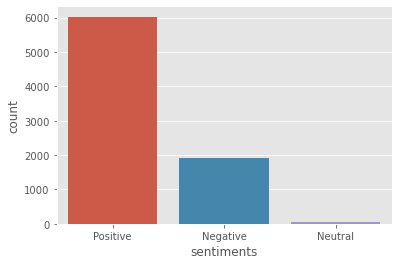

In [24]:
sns.countplot(x='sentiments',data=df)
plt.show()

In [25]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [26]:
df['No_of_Words']= df['text'].apply(no_of_words)

In [27]:
df.head()

,headline,text,Polarity_sentiments,sentiments,No_of_Words
0,Yields on CDs Fell in the Latest Week,new york yields certificates deposit offered m...,0.042596,Positive,87
1,The Morning Brief: White House Seeks to Limit ...,wall street journal onlinebrbrthe morning brie...,0.044817,Positive,215
2,Banking Bill Negotiators Set Compromise --- Pl...,washington effort achieve banking reform senat...,0.079894,Positive,132
3,Manager's Journal: Sniffing Out Drug Abusers I...,statistics enormous costs employee drug abuse ...,0.117193,Positive,210
4,Currency Trading: Dollar Remains in Tight Rang...,new york indecision marked dollars tone trader...,0.017164,Positive,90


In [28]:
Pos_comments = df[df.sentiments=='Positive']

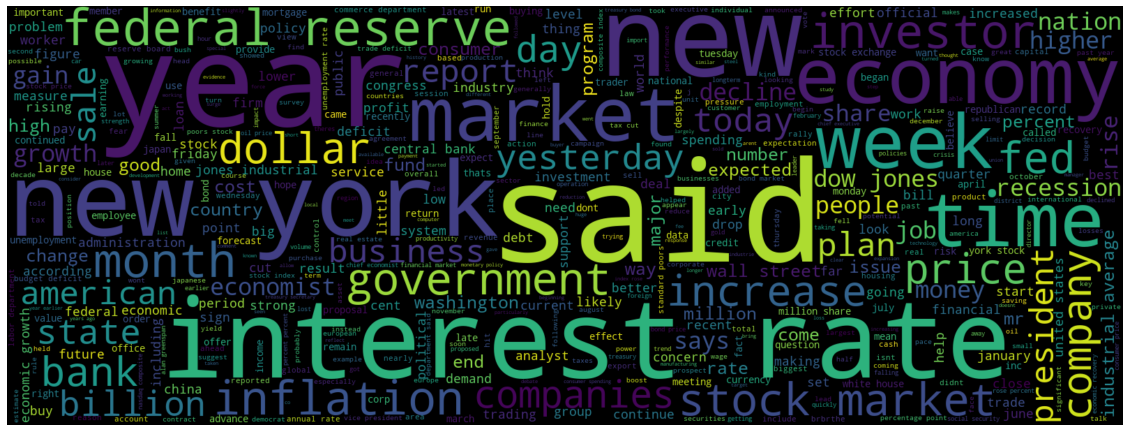

In [35]:
plt.figure(figsize=(20,15))
textme= ' '.join(words for words in Pos_comments['text'])
wordcloud = WordCloud(max_words=500, width=1600,height=600).generate(textme)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
Neg_comments = df[df.sentiments=='Negative']

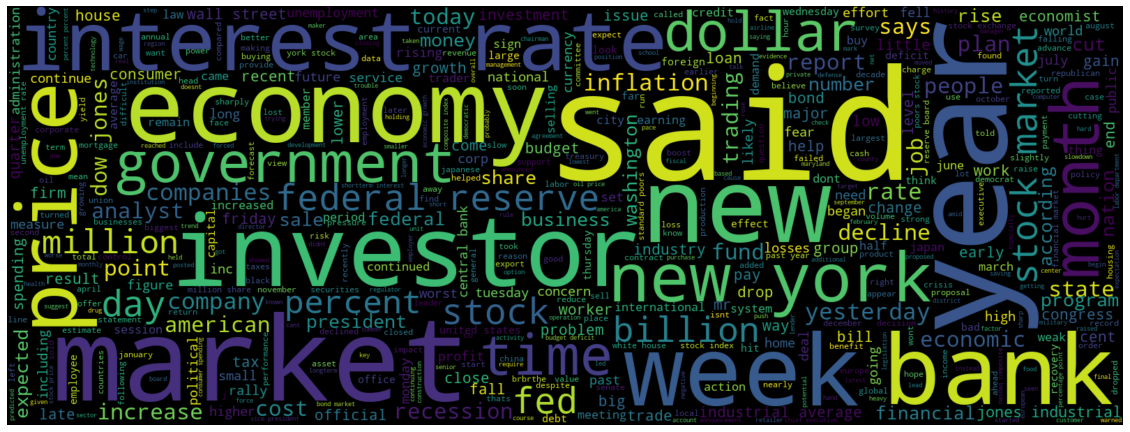

In [37]:
plt.figure(figsize=(20,15))
textme= ' '.join(words for words in Neg_comments['text'])
wordcloud = WordCloud(max_words=500, width=1600,height=600).generate(textme)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
Neu_comments = df[df.sentiments=='Neutral']

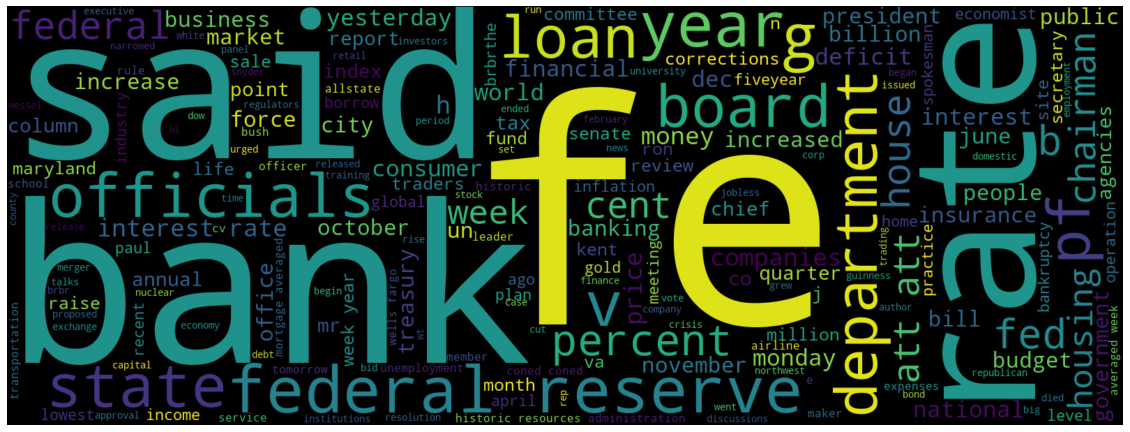

In [40]:
plt.figure(figsize=(20,15))
textme= ' '.join(words for words in Neu_comments['text'])
wordcloud = WordCloud( width=1600,height=600).generate(textme)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
from collections import Counter
count = Counter()
for text in Pos_comments['text'].values:
    for word in text.split():
        count[word]+=1
count.most_common(30)

[('said', 6198),
 ('new', 4916),
 ('year', 4227),
 ('market', 4125),
 ('stock', 3504),
 ('economic', 3333),
 ('rates', 3131),
 ('percent', 3107),
 ('federal', 2955),
 ('interest', 2819),
 ('economy', 2669),
 ('prices', 2537),
 ('rate', 2526),
 ('billion', 2509),
 ('million', 2276),
 ('inflation', 2239),
 ('years', 2214),
 ('growth', 1991),
 ('york', 1978),
 ('investors', 1891),
 ('rose', 1885),
 ('president', 1837),
 ('stocks', 1729),
 ('government', 1694),
 ('fed', 1647),
 ('time', 1639),
 ('week', 1630),
 ('reserve', 1611),
 ('average', 1604),
 ('index', 1574)]

In [42]:
Pos_df = pd.DataFrame(count.most_common(30),columns=['PosWords','Count'])

In [44]:
Pos_df.head()

,PosWords,Count
0,said,6198
1,new,4916
2,year,4227
3,market,4125
4,stock,3504


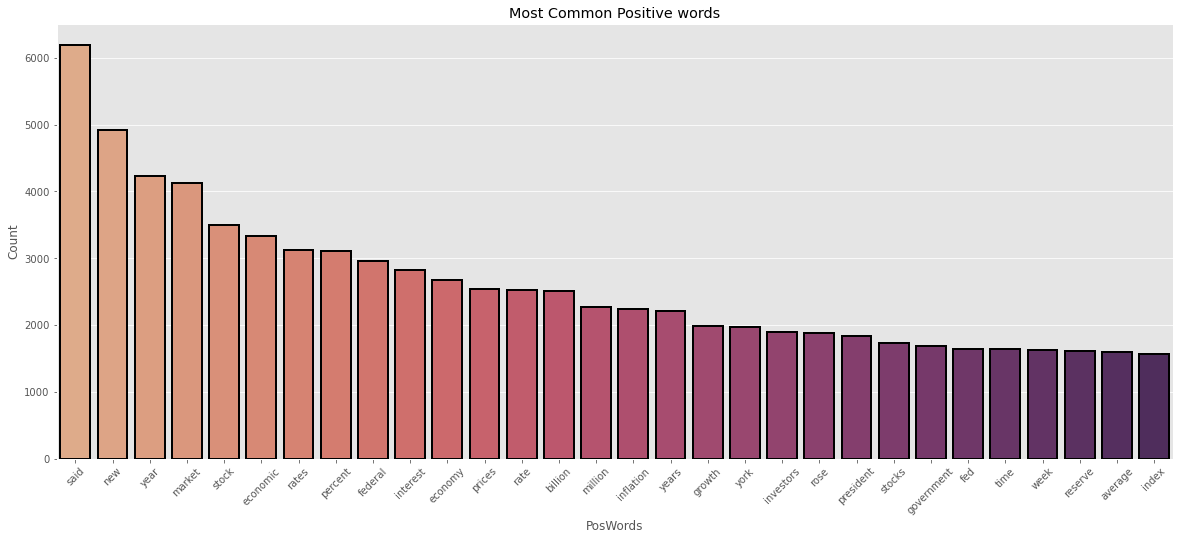

In [54]:
#Visualizing the graphy
plt.figure(figsize=(20,8))
sns.barplot(x='PosWords',y='Count',data=Pos_df,palette='flare',edgecolor='black',linewidth=2)
plt.title('Most Common Positive words')
plt.xticks(rotation=45)
plt.show()

In [49]:
count = Counter()
for text in Neg_comments['text'].values:
    for word in text.split():
        count[word]+=1
count.most_common(25)

[('said', 2024),
 ('market', 1393),
 ('year', 1244),
 ('stock', 1230),
 ('new', 1188),
 ('federal', 978),
 ('percent', 881),
 ('rates', 821),
 ('prices', 771),
 ('million', 751),
 ('billion', 732),
 ('economy', 729),
 ('rate', 728),
 ('interest', 690),
 ('average', 664),
 ('investors', 657),
 ('years', 650),
 ('economic', 595),
 ('york', 582),
 ('stocks', 572),
 ('government', 558),
 ('week', 541),
 ('president', 540),
 ('financial', 528),
 ('inflation', 497)]

In [50]:
Neg_df = pd.DataFrame(count.most_common(25),columns=['NegWords','Count'])

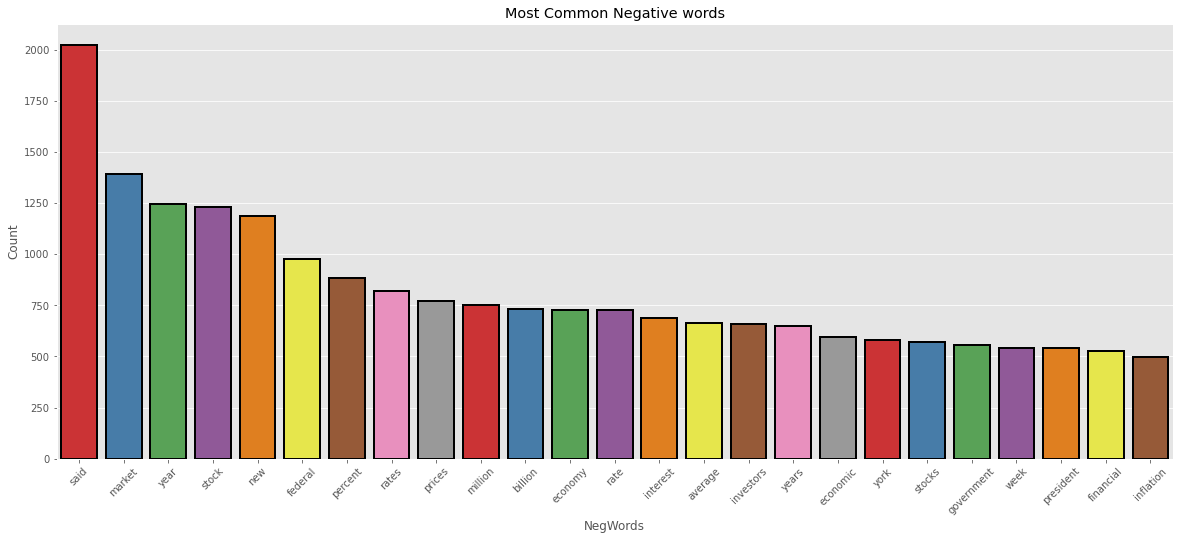

In [55]:
plt.figure(figsize=(20,8))
sns.barplot(x='NegWords',y='Count',data=Neg_df,palette='Set1',edgecolor='black',linewidth=2)
plt.title('Most Common Negative words')
plt.xticks(rotation=45)
plt.show()

In [66]:
#Developing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [59]:
x= df['text']
vector = TfidfVectorizer()
x = vector.fit_transform(x)

In [63]:
df.sentiments.replace('Positive',2,inplace=True)
df.sentiments.replace('Negative',1,inplace=True)
df.sentiments.replace('Neutral',0,inplace=True)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=100)

In [62]:
y=df['sentiments']

In [67]:
#Logistic regression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr_pred = lr.predict(xtest)
lr_acc = accuracy_score(ytest,lr_pred)

In [68]:
print('Accuracy is: {:}%'.format(lr_acc*100))

Accuracy is: 78.4375%


In [74]:
print('Confusion Matrix: \n',confusion_matrix(ytest,lr_pred))
print('classification report: \n')
print(classification_report(ytest,lr_pred))

Confusion Matrix: 
 [[   0    0   18]
 [   0   51  319]
 [   0    8 1204]]
classification report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.86      0.14      0.24       370
           2       0.78      0.99      0.87      1212

    accuracy                           0.78      1600
   macro avg       0.55      0.38      0.37      1600
weighted avg       0.79      0.78      0.72      1600



In [75]:
#SVM
svc = LinearSVC()
svc.fit(xtrain,ytrain)
svc_pred = svc.predict(xtest)
svc_acc = accuracy_score(ytest,svc_pred)

In [76]:
print('Accuracy is: {:}%'.format(svc_acc*100))

Accuracy is: 80.875%


In [77]:
print('Confusion Matrix: \n',confusion_matrix(ytest,svc_pred))
print('classification report: \n')
print(classification_report(ytest,svc_pred))

Confusion Matrix: 
 [[   0    0   18]
 [   0  125  245]
 [   0   43 1169]]
classification report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.74      0.34      0.46       370
           2       0.82      0.96      0.88      1212

    accuracy                           0.81      1600
   macro avg       0.52      0.43      0.45      1600
weighted avg       0.79      0.81      0.78      1600



In [78]:
#Naivesbayes
mt = MultinomialNB()
mt.fit(xtrain,ytrain)
mt_pred = mt.predict(xtest)
mt_acc = accuracy_score(ytest,mt_pred)

In [79]:
print('Accuracy is: {:}%'.format(mt_acc*100))

Accuracy is: 75.75%


In [80]:
print('Confusion Matrix: \n',confusion_matrix(ytest,mt_pred))
print('classification report: \n')
print(classification_report(ytest,mt_pred))

Confusion Matrix: 
 [[   0    2   16]
 [   0    0  370]
 [   0    0 1212]]
classification report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00       370
           2       0.76      1.00      0.86      1212

    accuracy                           0.76      1600
   macro avg       0.25      0.33      0.29      1600
weighted avg       0.57      0.76      0.65      1600



In [81]:
#Cross validation Test
param_grid = {'C':[0.1, 1, 10, 100],'loss':['hinge','squared_hinge']}
grid = GridSearchCV(svc,param_grid,refit=True,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..............................C=0.1, loss=hinge; total time=   0.2s
[CV 2/5] END ..............................C=0.1, loss=hinge; total time=   0.3s
[CV 3/5] END ..............................C=0.1, loss=hinge; total time=   0.3s
[CV 4/5] END ..............................C=0.1, loss=hinge; total time=   0.3s
[CV 5/5] END ..............................C=0.1, loss=hinge; total time=   0.2s
[CV 1/5] END ......................C=0.1, loss=squared_hinge; total time=   0.1s
[CV 2/5] END ......................C=0.1, loss=squared_hinge; total time=   0.1s
[CV 3/5] END ......................C=0.1, loss=squared_hinge; total time=   0.1s
[CV 4/5] END ......................C=0.1, loss=squared_hinge; total time=   0.1s
[CV 5/5] END ......................C=0.1, loss=squared_hinge; total time=   0.0s
[CV 1/5] END ................................C=1, loss=hinge; total time=   0.4s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [82]:
print('Best Cross Validation: {:.2f}%'.format(grid.best_score_*100))
print('Best parameters: ',grid.best_params_)

Best Cross Validation: 81.36%
Best parameters:  {'C': 10, 'loss': 'squared_hinge'}


## THE END OF THE PROJECT